1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


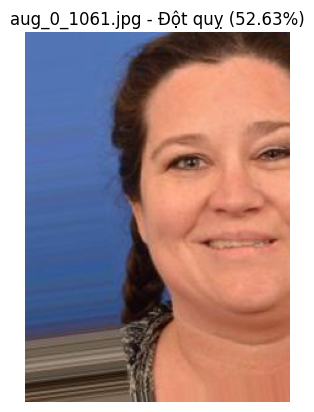

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


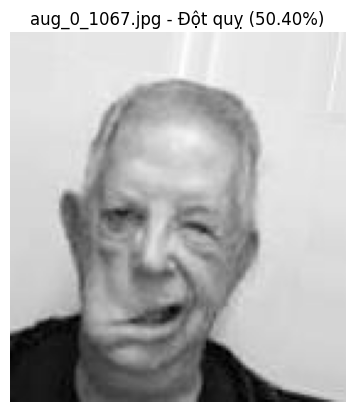

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


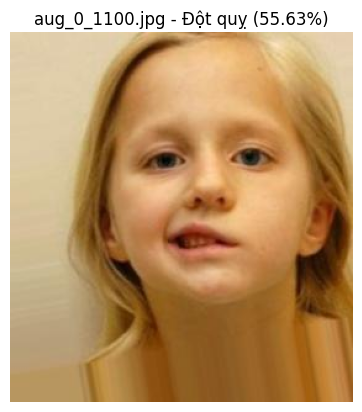

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


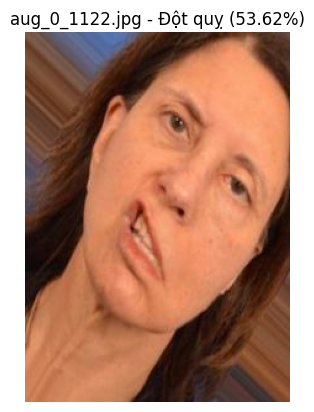

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


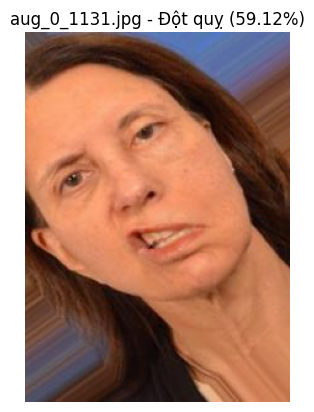

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


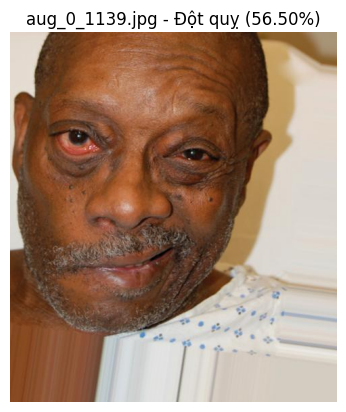

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


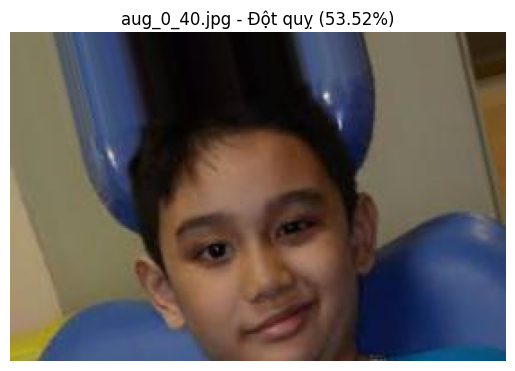

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


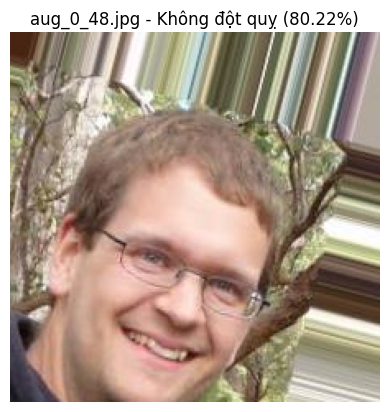

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


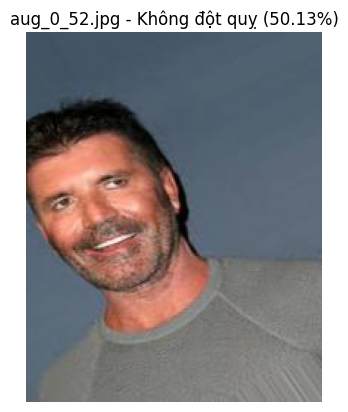

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


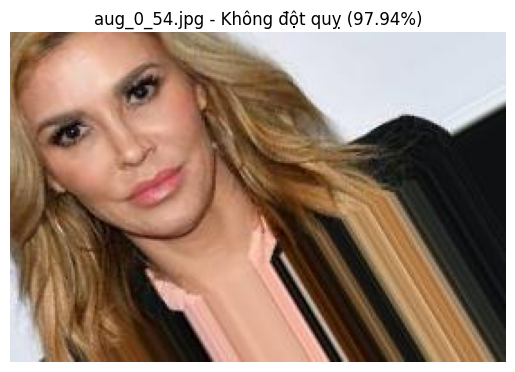

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


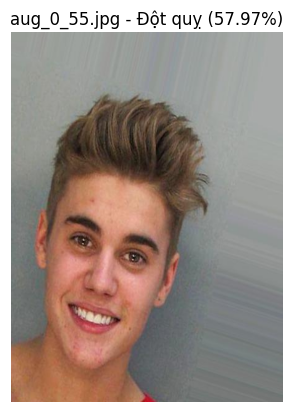

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


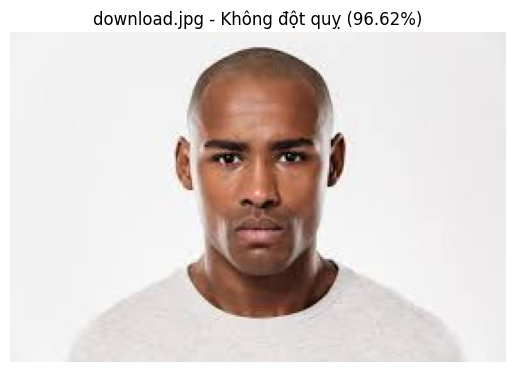

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


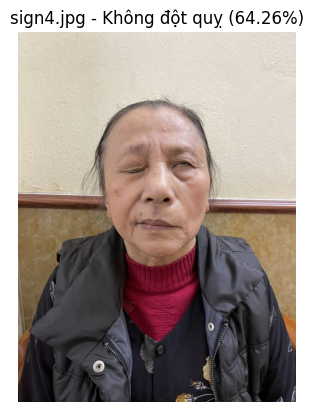

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


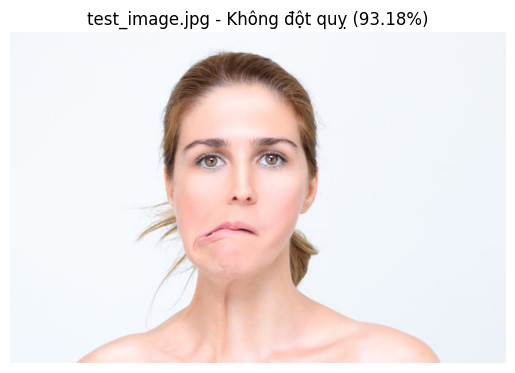

In [19]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Tải mô hình
model = load_model(r'D:\Năm 3 - HK2\Dữ liệu lớn\DeepStroke\backend\models\vgg16_model.h5')

# Hàm xử lý ảnh
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img_resized = img.resize((224, 224))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

# Thư mục chứa ảnh test
test_folder = r"D:\Năm 3 - HK2\Dữ liệu lớn\DeepStroke\data\test_data"

# Duyệt ảnh
for filename in os.listdir(test_folder):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        image_path = os.path.join(test_folder, filename)
        img_array, original_img = load_and_preprocess_image(image_path)
        prediction = model.predict(img_array)
        
        predicted_label = "Đột quỵ" if prediction[0][0] > 0.5 else "Không đột quỵ"
        confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

        # Hiển thị ảnh và kết quả
        plt.imshow(original_img)
        plt.title(f"{filename} - {predicted_label} ({confidence:.2%})")
        plt.axis('off')
        plt.show()
